In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
import seaborn as sns
import nltk

from nltk import tokenize

In [2]:
def _nuvem_de_palavras(lista_texto):
    
    todas_palavras = ' '.join([texto for texto in lista_texto])
    nuvem_palavras = WordCloud(width=1600, height=1000, max_font_size=200, collocations=False, background_color="white").generate(todas_palavras)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [3]:
def _dist_freq(lista_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in lista_texto])

    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)

    frequencia_dataframe = pd.DataFrame({
    "Palavra": list(frequencia.keys()), 
    "Frequencia": list(frequencia.values())
    })

    return frequencia_dataframe.nlargest(columns="Frequencia", n = quantidade)

In [4]:
def _pareto(df_frequencia):
    
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequencia", color="gray")
    ax.set_ylabel("Frequência", fontsize=25)
    ax.set_xlabel("")
    plt.yticks(fontsize=25)
    plt.xticks(rotation=50, fontsize=20)
    plt.show()

### Quantidade de tweets em cada mês

In [5]:
tweets_coletados = pd.DataFrame()

In [6]:
mes = pd.read_csv("Dados\\Coletados\\janeiro.csv")
tweets_coletados["Janeiro"] = [mes["text"].count()]
mes.shape

(29716, 12)

In [7]:
mes = pd.read_csv("Dados\\Coletados\\fevereiro.csv")
tweets_coletados['Fevereiro'] = [mes["text"].count()]

mes = pd.read_csv("Dados\\Coletados\\marco.csv")
tweets_coletados['Março'] = [mes["text"].count()]

mes = pd.read_csv("Dados\\Coletados\\abril.csv")
tweets_coletados['Abril'] = [mes["text"].count()]

mes = pd.read_csv("Dados\\Coletados\\maio.csv")
tweets_coletados['Maio'] = [mes["text"].count()]

mes = pd.read_csv("Dados\\Coletados\\junho.csv")
tweets_coletados['Junho'] = [mes["text"].count()]

mes = pd.read_csv("Dados\\Coletados\\julho.csv")
tweets_coletados['Julho'] = [mes["text"].count()]

mes = pd.read_csv("Dados\\Coletados\\agosto.csv")
tweets_coletados['Agosto'] = [mes["text"].count()]

mes = pd.read_csv("Dados\\Coletados\\setembro.csv")
tweets_coletados['Setembro'] = [mes["text"].count()]

mes = pd.read_csv("Dados\\Coletados\\outubro.csv")
tweets_coletados['Outubro'] = [mes["text"].count()]

mes = pd.read_csv("Dados\\Coletados\\novembro.csv")
tweets_coletados['Novembro'] = [mes["text"].count()]

In [8]:
tweets_coletados.style.set_table_styles([
    {'selector' : 'th', 'props' : [("font-size", "120%"), ("text-align", "center"),
                                  ('background', '#606060'), ('color', 'white'),]},
    {'selector' : 'td', 'props' : [("font-size", "120%"), ("text-align", "center")]},
]).hide_index()

Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro
29716,104575,148101,134716,146362,104015,141055,40999,46371,65202,19465


### Quantidade de tweets nos arquivos utilizado para compor a base de treino e teste

In [9]:
tweets_treino = pd.DataFrame(columns = ['Arquivo', 'Positivo', 'Negativo', 'Neutro', 'Total'])

In [10]:
arquivo_treino = pd.read_csv("dados\\bases_classificadas\\TweetsNeutralHash.csv")
arquivo_treino.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1027376569449410562,@dilsonramoslima #Fato Acho que o Roger é um b...,Thu Aug 09 02:10:36 +0000 2018,Neutro,#fato
1,1026566106599833600,#NOVIDADE! @LATAM_BRA acaba de anunciar novo v...,Mon Aug 06 20:30:07 +0000 2018,Neutro,#novidade
2,1026445716808445952,Quando tem #novidade😆 tem @novafm103 na área! ...,Mon Aug 06 12:31:43 +0000 2018,Neutro,#novidade
3,1025980728356626434,@RiodeNojeira #Novidade Taí o sucesso dos filh...,Sun Aug 05 05:44:02 +0000 2018,Neutro,#novidade
4,1025531221978308608,"[Livro/Novidades] Segredos, uma história de Lu...",Fri Aug 03 23:57:51 +0000 2018,Neutro,#novidade


In [11]:
tweets_treino.loc[0] = ['tweets_treino.csv', 
                     (arquivo_treino.query("sentiment == 'Positivo'"))['sentiment'].count(),
                     (arquivo_treino.query("sentiment == 'Negativo'"))['sentiment'].count(),
                     (arquivo_treino.query("sentiment == 'Neutro'"))['sentiment'].count(),
                     0]

tweets_treino['Total'][0] = tweets_treino['Positivo'][0] + tweets_treino['Negativo'][0] + tweets_treino['Neutro'][0]
arquivo_treino['sentiment'].value_counts()

Neutro    15727
Name: sentiment, dtype: int64

In [12]:
arquivo_treino = pd.read_csv("dados\\bases_classificadas\\TweetsNeutralNews.csv")
arquivo_treino.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1038992008461930496,Esquerda e direita empatam na Suécia; ultranac...,Mon Sep 10 03:26:13 +0000 2018,Neutro,veja
1,1038873557902782465,Ao vivo: Estadão e TV Gazeta realizam terceiro...,Sun Sep 09 19:35:32 +0000 2018,Neutro,veja
2,1038869931398516736,FOTOS: Apoiadores de Jair Bolsonaro realizam a...,Sun Sep 09 19:21:07 +0000 2018,Neutro,veja
3,1038867128886198273,Barroso ameaça barrar propaganda se PT insisti...,Sun Sep 09 19:09:59 +0000 2018,Neutro,veja
4,1038859914339409920,Serena Williams é multada pelo comportamento d...,Sun Sep 09 18:41:19 +0000 2018,Neutro,veja


In [13]:
tweets_treino.loc[1] = ['TweetsNeutralNews.csv', 
                     (arquivo_treino.query("sentiment == 'Positivo'"))['sentiment'].count(),
                     (arquivo_treino.query("sentiment == 'Negativo'"))['sentiment'].count(),
                     (arquivo_treino.query("sentiment == 'Neutro'"))['sentiment'].count(),
                     0]

tweets_treino['Total'][1] = tweets_treino['Positivo'][1] + tweets_treino['Negativo'][1] + tweets_treino['Neutro'][1]

arquivo_treino['sentiment'].value_counts()

Neutro    37556
Name: sentiment, dtype: int64

In [14]:
arquivo_treino = pd.read_csv("dados\\bases_classificadas\\TweetsWithTheme.csv")
arquivo_treino.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1026606627041026050,ela vendo a família :( FUGIDINHA VERA LÚCIA,Mon Aug 06 23:11:07 +0000 2018,Negativo,vera lucia :(
1,1026266117646561281,Eu odeio o fato que muito provavelmente meu vo...,Mon Aug 06 00:38:04 +0000 2018,Negativo,ciro :(
2,1025889796097564672,"Ciro ""mita"" tanto quanto aquele outro, não que...",Sat Aug 04 23:42:42 +0000 2018,Negativo,ciro :(
3,1026960047937646598,Raiva do Bolsonaro agora :),Tue Aug 07 22:35:30 +0000 2018,Positivo,bolsonaro :)
4,1026447105932623872,Reflexos da alienação petista comandada por Lu...,Mon Aug 06 12:37:15 +0000 2018,Negativo,lula :(


In [15]:
tweets_treino.loc[2] = ['TweetsWithTheme.csv', 
                     (arquivo_treino.query("sentiment == 'Positivo'"))['sentiment'].count(),
                     (arquivo_treino.query("sentiment == 'Negativo'"))['sentiment'].count(),
                     (arquivo_treino.query("sentiment == 'Neutro'"))['sentiment'].count(),
                     0]

tweets_treino['Total'][2] = tweets_treino['Positivo'][2] + tweets_treino['Negativo'][2] + tweets_treino['Neutro'][2]

arquivo_treino['sentiment'].value_counts()

Positivo    32744
Negativo    28847
Name: sentiment, dtype: int64

In [16]:
arquivo_treino = pd.read_csv("dados\\bases_classificadas\\Tweets_Mg.csv")
arquivo_treino.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
tweets_treino.loc[3] = ['Tweets_Mg.csv', 
                     (arquivo_treino.query("Classificacao == 'Positivo'"))['Classificacao'].count(),
                     (arquivo_treino.query("Classificacao == 'Negativo'"))['Classificacao'].count(),
                     (arquivo_treino.query("Classificacao == 'Neutro'"))['Classificacao'].count(),
                     0]

tweets_treino['Total'][3] = tweets_treino['Positivo'][3] + tweets_treino['Negativo'][3] + tweets_treino['Neutro'][3]
arquivo_treino['Classificacao'].value_counts()

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

In [18]:
arquivo_treino = pd.read_csv("dados\\tweets_treino.csv")

tweets_treino.loc[4] = ['tweets_treino.csv', 
                     (arquivo_treino.query("Classificacao == 'Positivo'"))['Classificacao'].count(),
                     (arquivo_treino.query("Classificacao == 'Negativo'"))['Classificacao'].count(),
                     (arquivo_treino.query("Classificacao == 'Neutro'"))['Classificacao'].count(),
                     0]

tweets_treino['Total'][4] = tweets_treino['Positivo'][4] + tweets_treino['Negativo'][4] + tweets_treino['Neutro'][4]

In [19]:
tweets_treino.style.set_table_styles([
    {'selector' : 'th', 'props' : [("font-size", "120%"), ("text-align", "center"),
                                  ('background', '#606060'), ('color', 'white'),]},
    {'selector' : 'td', 'props' : [("font-size", "120%"), ("text-align", "center")]},
]).hide_index()

Arquivo,Positivo,Negativo,Neutro,Total
tweets_treino.csv,0,0,15727,15727
TweetsNeutralNews.csv,0,0,37556,37556
TweetsWithTheme.csv,32744,28847,0,61591
Tweets_Mg.csv,3300,2446,2453,8199
tweets_treino.csv,4900,4896,4903,14699


## Conferindo as bases depois de passar pelo pré-processamento

In [20]:
base_treino_teste = pd.read_csv("dados\\resultados\\base_treino_teste_processada.csv")

base_coletada = pd.read_csv("dados\\resultados\\base_coletada_processada.csv")

In [21]:
base_treino_teste = base_treino_teste.fillna('')

base_coletada = base_coletada.fillna('')

In [22]:
base_treino_teste.head()

,Text,Classificacao,URL,Hashtags,Mencoes,Abreviacoes,Emoticons,Stopwords
0,Trio é detido após assaltar pizzaria em Uberlâ...,Positivo,trio é detido após assaltar pizzaria em uberlâ...,trio é detido após assaltar pizzaria em uberlâ...,trio é detido após assaltar pizzaria em uberlâ...,trio é detido após assaltar pizzaria em uberlâ...,trio é detido após assaltar pizzaria em uberlâ...,trio detido após assaltar pizzaria uberlândia ...
1,@PMMG190 - 42º BPM: POLICIAIS MILITARES DE CUR...,Positivo,@pmmg190 - 42º bpm: policiais militares de cur...,@pmmg190 - 42º bpm: policiais militares de cur...,- 42º bpm: policiais militares de curvelo pre...,- 42º bpm : policiais militares de curvelo pre...,- 42º bpm : policiais militares de curvelo pre...,42º bpm policiais militares curvelo prendem tr...
2,Presídio em Minas adota novo modelo e consegue...,Positivo,presídio em minas adota novo modelo e consegue...,presídio em minas adota novo modelo e consegue...,presídio em minas adota novo modelo e consegue...,presídio em minas adota novo modelo e consegue...,presídio em minas adota novo modelo e consegue...,presídio minas adota novo modelo consegue recu...
3,"Um jovem é preso, um menor apreendido por tráf...",Positivo,"um jovem é preso, um menor apreendido por tráf...","um jovem é preso, um menor apreendido por tráf...","um jovem é preso, um menor apreendido por tráf...","um jovem é preso , um menor apreendido por trá...","um jovem é preso , um menor apreendido por trá...",jovem preso menor apreendido tráfico drogas zo...
4,"Trio é preso suspeito de roubo, tráfico e abus...",Positivo,"trio é preso suspeito de roubo, tráfico e abus...","trio é preso suspeito de roubo, tráfico e abus...","trio é preso suspeito de roubo, tráfico e abus...","trio é preso suspeito de roubo , tráfico e abu...","trio é preso suspeito de roubo , tráfico e abu...",trio preso suspeito roubo tráfico abuso sexual...


In [23]:
for texto in base_treino_teste['Text'].sample(n=5, random_state=7):
    print(texto)
    print()

leiam! ler nunca é demais... :D https://t.co/vqLOqbAFXH

Veja o que é #FATO ou #FAKE na entrevista de Bolsonaro no Roda Viva. https://t.co/WaSuIvhwIf https://t.co/82JIpCwstl

Viçosa e Muriaé recebem mais doses da vacina contra febre amarela: Em São João Nepomuceno, previsão é de que doses…… https://t.co/gLOEenlWjG

É tão triste ver candidatos como @meirelles láá em baixo nas intenções de voto. Em compensação, gente q n merece ta láá em cima... propostas tão boas e ngm dá atenção........ esse é o BRASIL :(

RT @AnaPaulaVolei: Mais 2 helicópteros!!A cara de pau e a canalhice ainda só ñ são maiores q a calamidade financeira q vive o estado.

 htt…



In [24]:
for texto in base_treino_teste['URL'].sample(n=5, random_state=7):
    print(texto)
    print()

leiam! ler nunca é demais... :d 

veja o que é #fato ou #fake na entrevista de bolsonaro no roda viva.  

viçosa e muriaé recebem mais doses da vacina contra febre amarela: em são joão nepomuceno, previsão é de que doses…… 

é tão triste ver candidatos como @meirelles láá em baixo nas intenções de voto. em compensação, gente q n merece ta láá em cima... propostas tão boas e ngm dá atenção........ esse é o brasil :(

rt @anapaulavolei: mais 2 helicópteros!!a cara de pau e a canalhice ainda só ñ são maiores q a calamidade financeira q vive o estado.

 htt…



In [25]:
for texto in base_treino_teste['Hashtags'].sample(n=5, random_state=7):
    print(texto)
    print()

leiam! ler nunca é demais... :d 

veja o que é  ou  na entrevista de bolsonaro no roda viva.  

viçosa e muriaé recebem mais doses da vacina contra febre amarela: em são joão nepomuceno, previsão é de que doses…… 

é tão triste ver candidatos como @meirelles láá em baixo nas intenções de voto. em compensação, gente q n merece ta láá em cima... propostas tão boas e ngm dá atenção........ esse é o brasil :(

rt @anapaulavolei: mais 2 helicópteros!!a cara de pau e a canalhice ainda só ñ são maiores q a calamidade financeira q vive o estado.

 htt…



In [26]:
for texto in base_treino_teste['Mencoes'].sample(n=5, random_state=7):
    print(texto)
    print()

leiam! ler nunca é demais... :d 

veja o que é  ou  na entrevista de bolsonaro no roda viva.  

viçosa e muriaé recebem mais doses da vacina contra febre amarela: em são joão nepomuceno, previsão é de que doses…… 

é tão triste ver candidatos como  láá em baixo nas intenções de voto. em compensação, gente q n merece ta láá em cima... propostas tão boas e ngm dá atenção........ esse é o brasil :(

rt : mais 2 helicópteros!!a cara de pau e a canalhice ainda só ñ são maiores q a calamidade financeira q vive o estado.

 htt…



In [27]:
for texto in base_treino_teste['Abreviacoes'].sample(n=5, random_state=7):
    print(texto)
    print()

leiam ! ler nunca é demais ... :d

veja o que é ou na entrevista de bolsonaro no roda viva .

viçosa e muriaé recebem mais doses da vacina contra febre amarela : em são joão nepomuceno , previsão é de que doses … …

é estão triste ver candidatos como láá em baixo nas intenções de voto . em compensação , gente que não merece está láá em cima ... propostas estão boas e ninguém dá atenção ... esse é o brasil :(

rt : mais 2 helicópteros ! ! a cara de pau e a canalhice ainda só não são maiores que a calamidade financeira que vive o estado . htt …



In [28]:
for texto in base_treino_teste['Emoticons'].sample(n=5, random_state=7):
    print(texto)
    print()

leiam ! ler nunca é demais ... emoticon_positivo

veja o que é ou na entrevista de bolsonaro no roda viva .

viçosa e muriaé recebem mais doses da vacina contra febre amarela : em são joão nepomuceno , previsão é de que doses … …

é estão triste ver candidatos como láá em baixo nas intenções de voto . em compensação , gente que não merece está láá em cima ... propostas estão boas e ninguém dá atenção ... esse é o brasil emoticon_negativo

rt : mais 2 helicópteros ! ! a cara de pau e a canalhice ainda só não são maiores que a calamidade financeira que vive o estado . htt …



In [29]:
for texto in base_treino_teste['Stopwords'].sample(n=5, random_state=7):
    print(texto)
    print()

leiam ler nunca demais emoticon_positivo

veja entrevista bolsonaro roda viva

viçosa muriaé recebem doses vacina contra febre amarela joão nepomuceno previsão doses

triste ver candidatos láá baixo intenções voto compensação gente merece láá cima propostas boas ninguém dá atenção brasil emoticon_negativo

2 helicópteros cara pau canalhice ainda maiores calamidade financeira vive estado



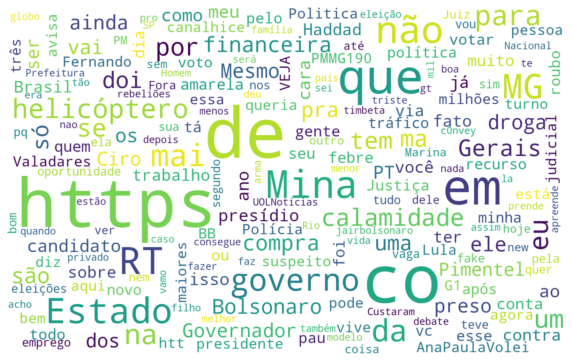

In [30]:
_nuvem_de_palavras(base_treino_teste["Text"])

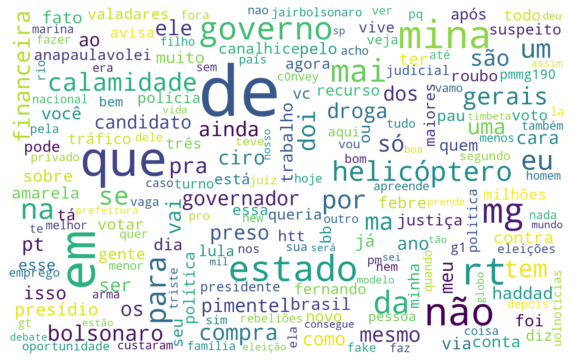

In [31]:
_nuvem_de_palavras(base_treino_teste['URL'])

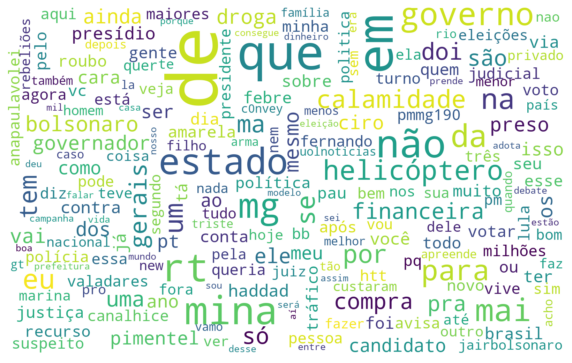

In [32]:
_nuvem_de_palavras(base_treino_teste["Hashtags"])

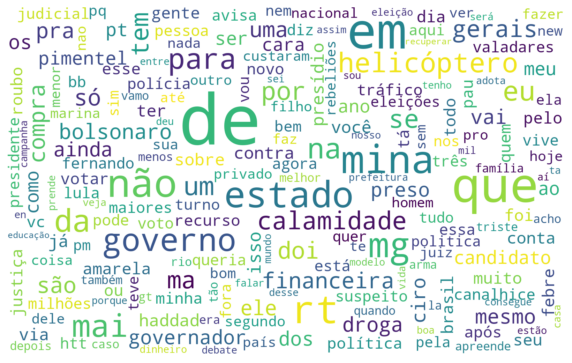

In [33]:
_nuvem_de_palavras(base_treino_teste["Mencoes"])

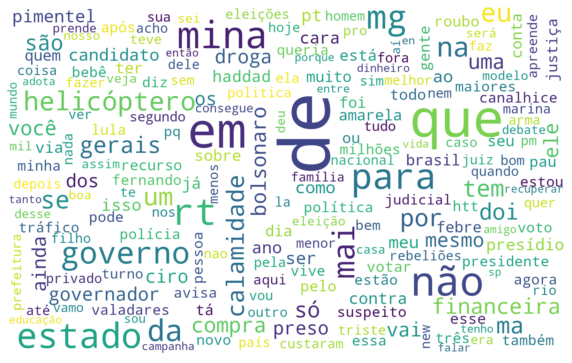

In [34]:
_nuvem_de_palavras(base_treino_teste["Abreviacoes"])

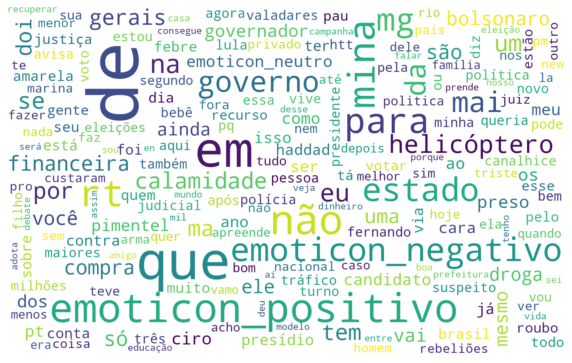

In [35]:
_nuvem_de_palavras(base_treino_teste["Emoticons"])

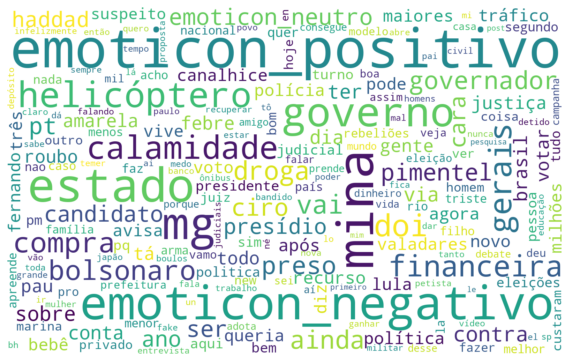

In [36]:
_nuvem_de_palavras(base_treino_teste["Stopwords"])

In [37]:
frequencia_palavras = _dist_freq(base_treino_teste["Text"], 15)
frequencia_palavras

,Palavra,Frequencia
50,de,11699
34,e,4844
135,que,4777
6,em,4732
194,o,4702
244,a,4188
106,do,3280
73,RT,2928
1,é,2919
128,não,2498


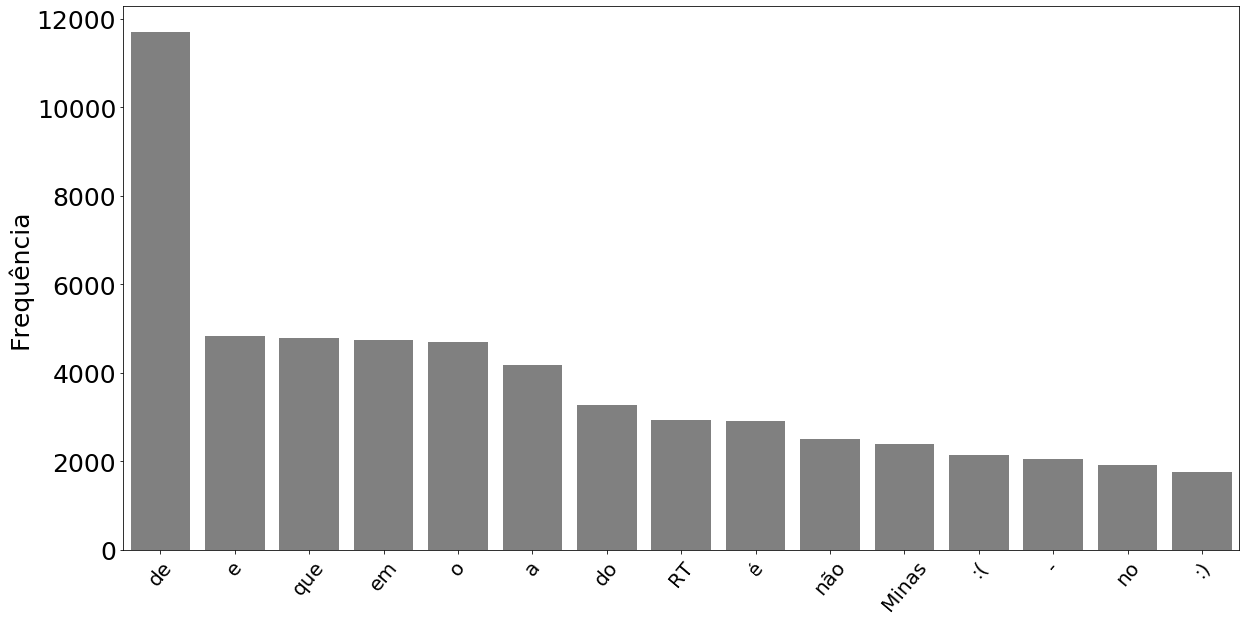

In [38]:
_pareto(frequencia_palavras)

In [39]:
frequencia_palavras = _dist_freq(base_treino_teste["URL"], 15)
frequencia_palavras

,Palavra,Frequencia
23,de,12007
90,o,5427
32,e,5282
6,em,5254
118,que,4956
194,a,4631
92,do,3381
1,é,3195
64,rt,2932
113,não,2822


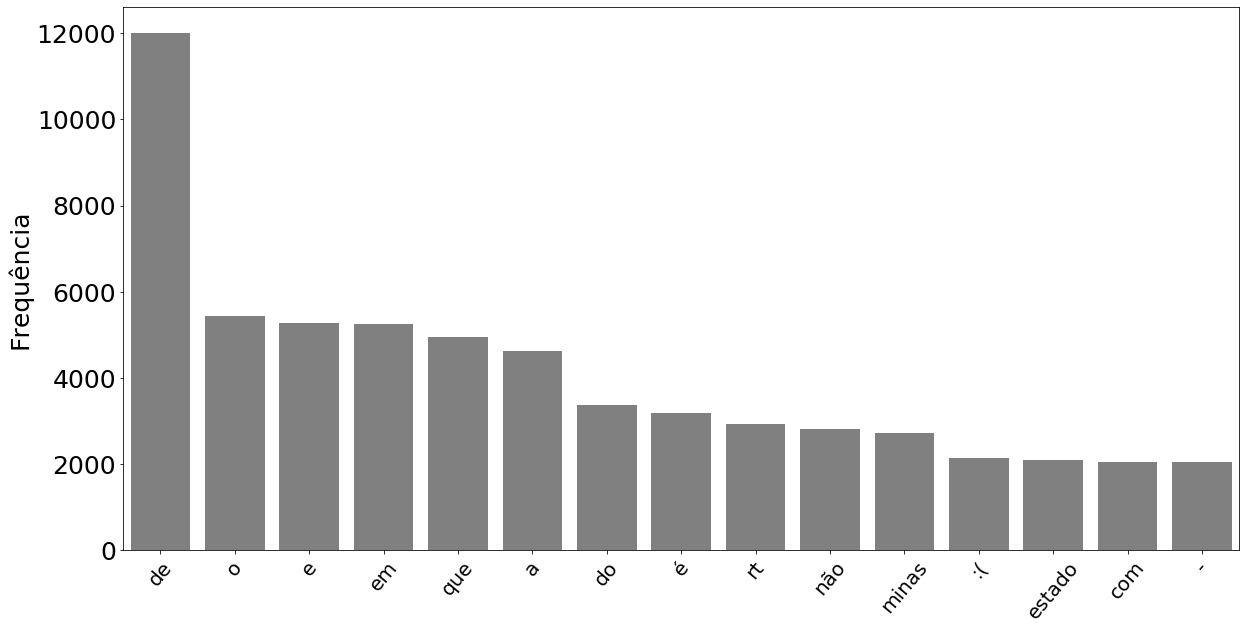

In [40]:
_pareto(frequencia_palavras)

In [41]:
frequencia_palavras = _dist_freq(base_treino_teste["Hashtags"], 15)
frequencia_palavras

,Palavra,Frequencia
23,de,12007
87,o,5427
32,e,5282
6,em,5254
115,que,4956
185,a,4631
89,do,3381
1,é,3195
64,rt,2932
110,não,2822


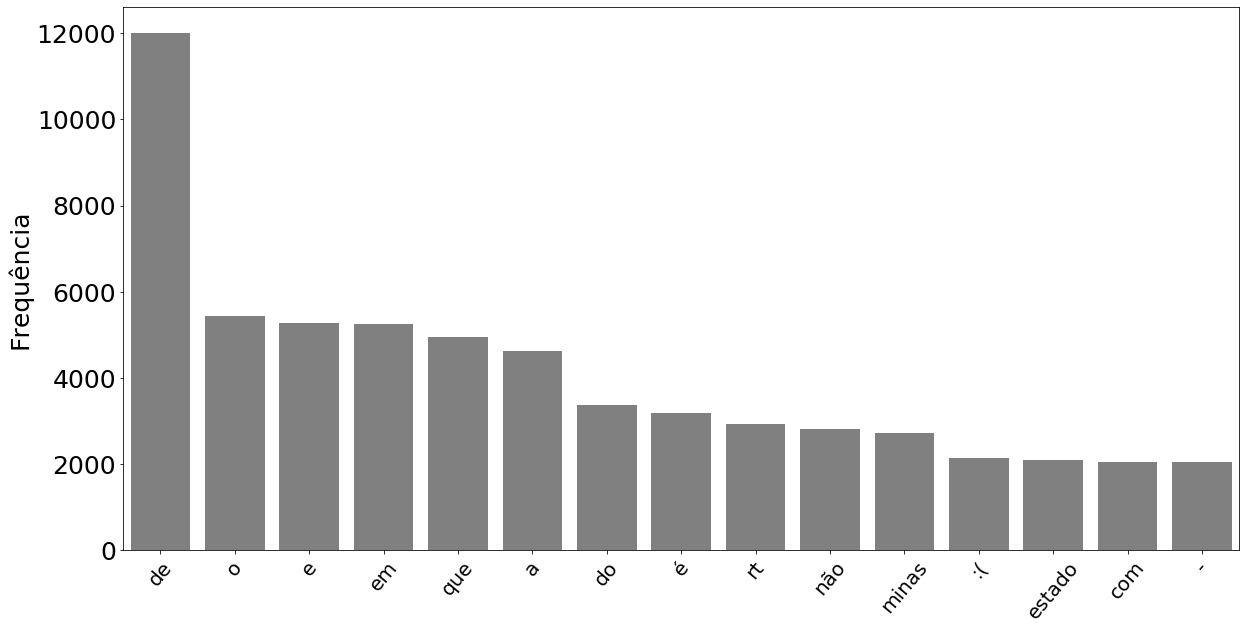

In [42]:
_pareto(frequencia_palavras)

In [43]:
frequencia_palavras = _dist_freq(base_treino_teste["Mencoes"], 15)
frequencia_palavras

,Palavra,Frequencia
22,de,12007
85,o,5427
31,e,5282
6,em,5255
113,que,4956
179,a,4631
87,do,3381
1,é,3195
64,:,3039
63,rt,2932


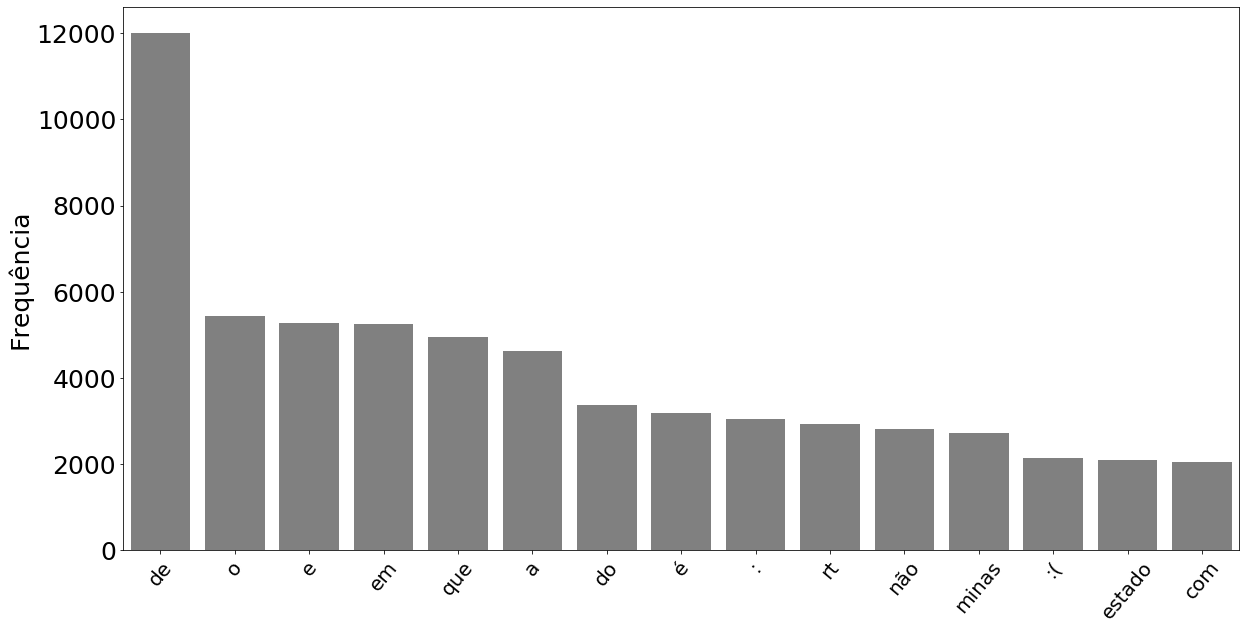

In [44]:
_pareto(frequencia_palavras)

In [45]:
frequencia_palavras = _dist_freq(base_treino_teste["Abreviacoes"], 15)
frequencia_palavras

,Palavra,Frequencia
27,de,12097
18,",",9038
116,que,6153
87,o,5502
98,.,5422
36,e,5356
6,em,5354
180,a,5040
8,:,4520
111,não,3533


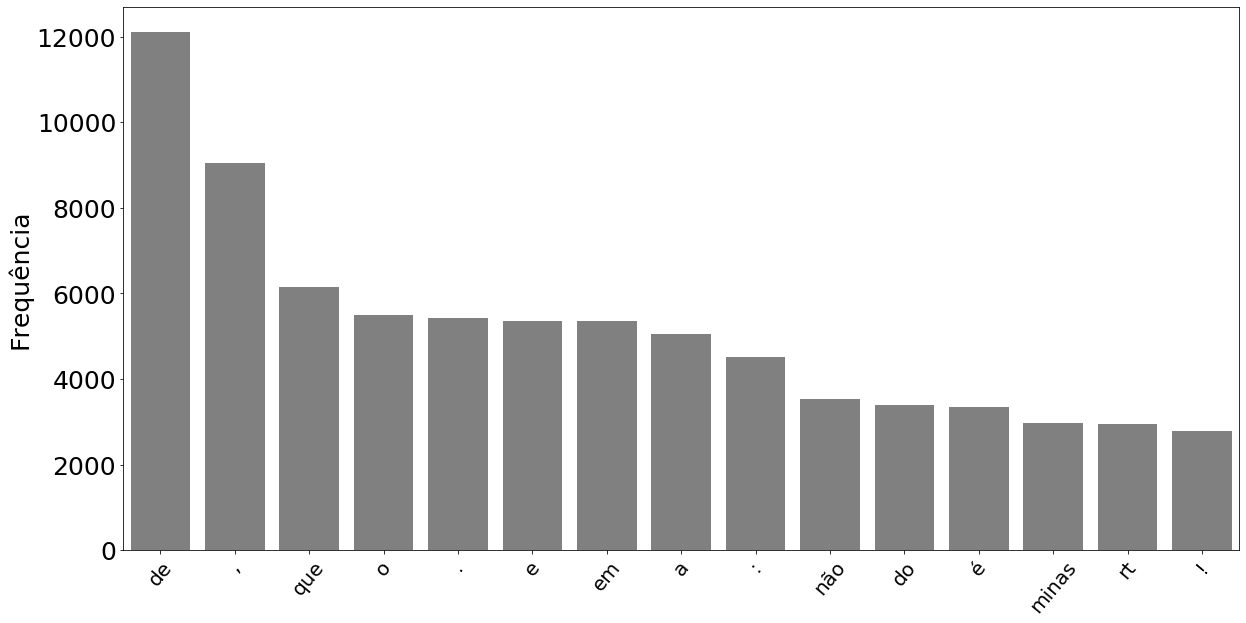

In [46]:
_pareto(frequencia_palavras)

In [47]:
frequencia_palavras = _dist_freq(base_treino_teste["Emoticons"], 15)
frequencia_palavras

,Palavra,Frequencia
27,de,12097
18,",",9038
116,que,6153
87,o,5502
98,.,5422
36,e,5356
6,em,5354
180,a,5040
8,:,4520
111,não,3533


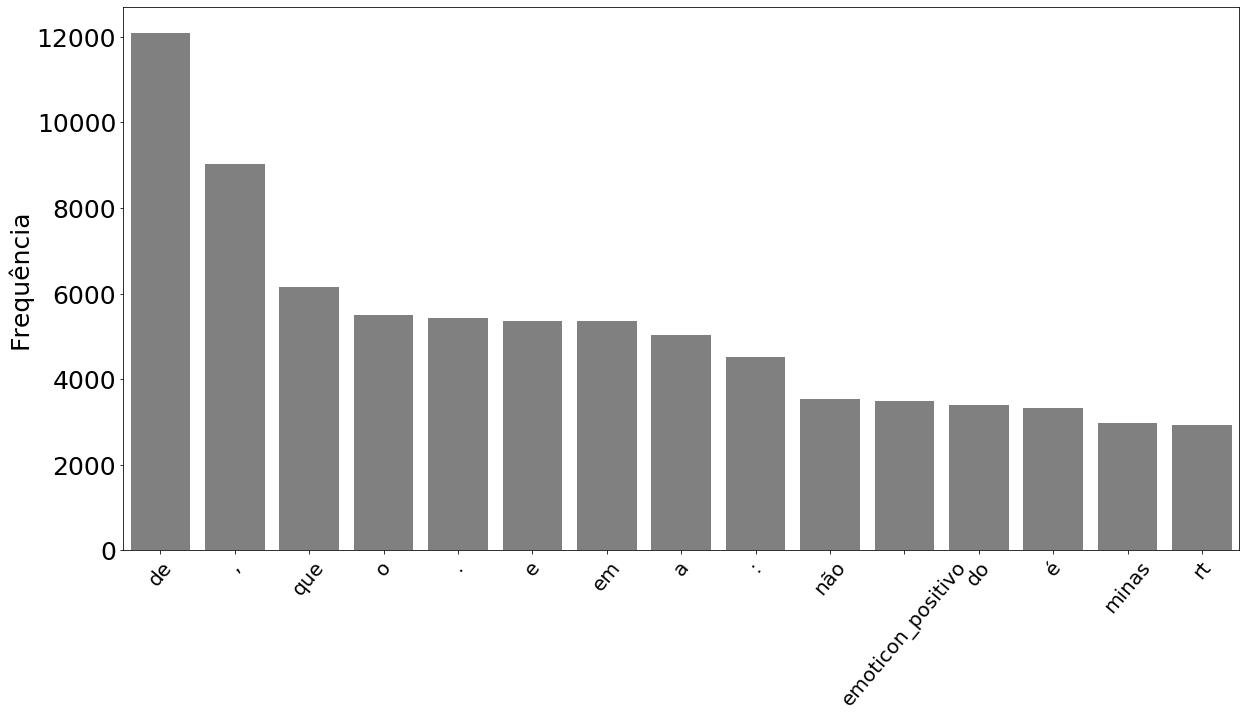

In [48]:
_pareto(frequencia_palavras)

In [49]:
frequencia_palavras = _dist_freq(base_treino_teste["Stopwords"], 15)
frequencia_palavras

,Palavra,Frequencia
706,emoticon_positivo,3483
21,minas,2977
881,emoticon_negativo,2585
285,estado,2532
39,mg,2229
60,governo,1966
1793,helicópteros,1322
1805,calamidade,1185
102,gerais,1099
92,dois,1051


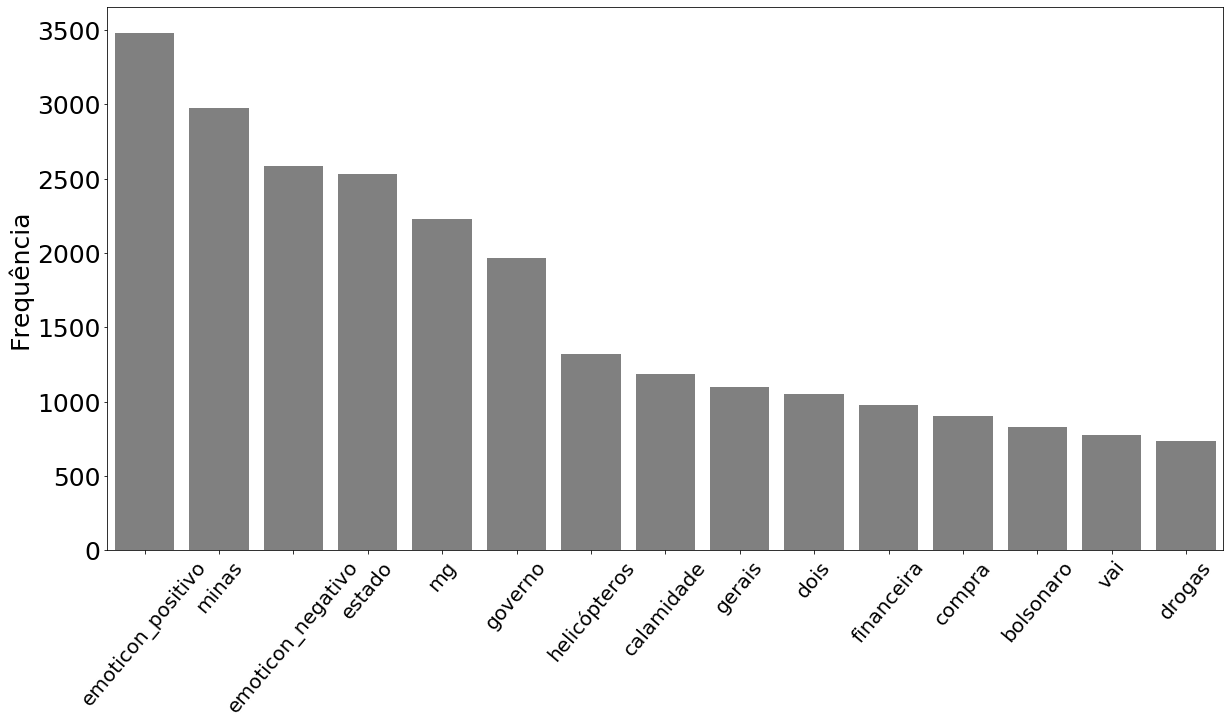

In [50]:
_pareto(frequencia_palavras)

In [51]:
base_coletada

,date,text,mes,Texto Processado
0,2019-01-31 23:59:17,☝️E jornalista sabichão apoiando reforma fasci...,Janeiro,emoticon_positivo ️ jornalista sabichão apoian...
1,2019-01-31 23:59:03,Isso é só uma demostração do que virar quando ...,Janeiro,demostração virar chegar congresso
2,2019-01-31 23:57:31,Governo diz que espera aprovar reforma da Prev...,Janeiro,governo diz espera aprovar 1º semestre
3,2019-01-31 23:56:44,"Joice, mudadando de assunto, é verdade q o gov...",Janeiro,joice mudadando assunto verdade governo pedind...
4,2019-01-31 23:56:20,meu pai foi muito bolsominion arrepedindo fala...,Janeiro,pai bolsominion arrepedindo falando discurso m...
...,...,...,...,...
980572,2019-11-01 00:03:11,Amoedo fosse presidente estaria jantando com R...,Novembro,amoedo presidente estaria jantando rodrigo mai...
980573,2019-11-01 00:02:37,Essa devia ter sido a primeira reforma. Depois...,Novembro,devia ter sido primeira modernização decente c...
980574,2019-11-01 00:00:52,Se for preciso podemos fazer uma vakinha p ela...,Novembro,preciso podemos fazer vakinha ir pessoalmente ...
980575,2019-11-01 00:00:04,Sindicato tenta barrar reforma da previdência ...,Novembro,sindicato tenta barrar governo goiás justiça


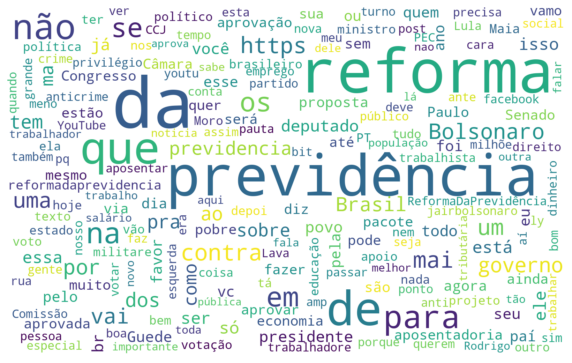

In [52]:
_nuvem_de_palavras(base_coletada['text'])

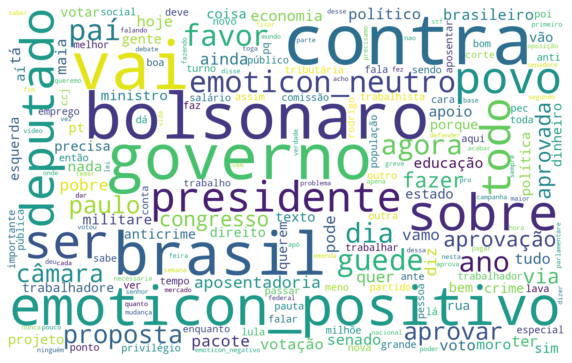

In [53]:
_nuvem_de_palavras(base_coletada['Texto Processado'])

In [54]:
frequencia_palavras = _dist_freq(base_coletada['text'], 15)
frequencia_palavras

,Palavra,Frequencia
6,da,1300416
17,a,890001
4,reforma,681446
33,de,586116
14,que,535204
37,o,534216
63,e,504002
13,do,331557
9,é,283378
18,previdência,283047


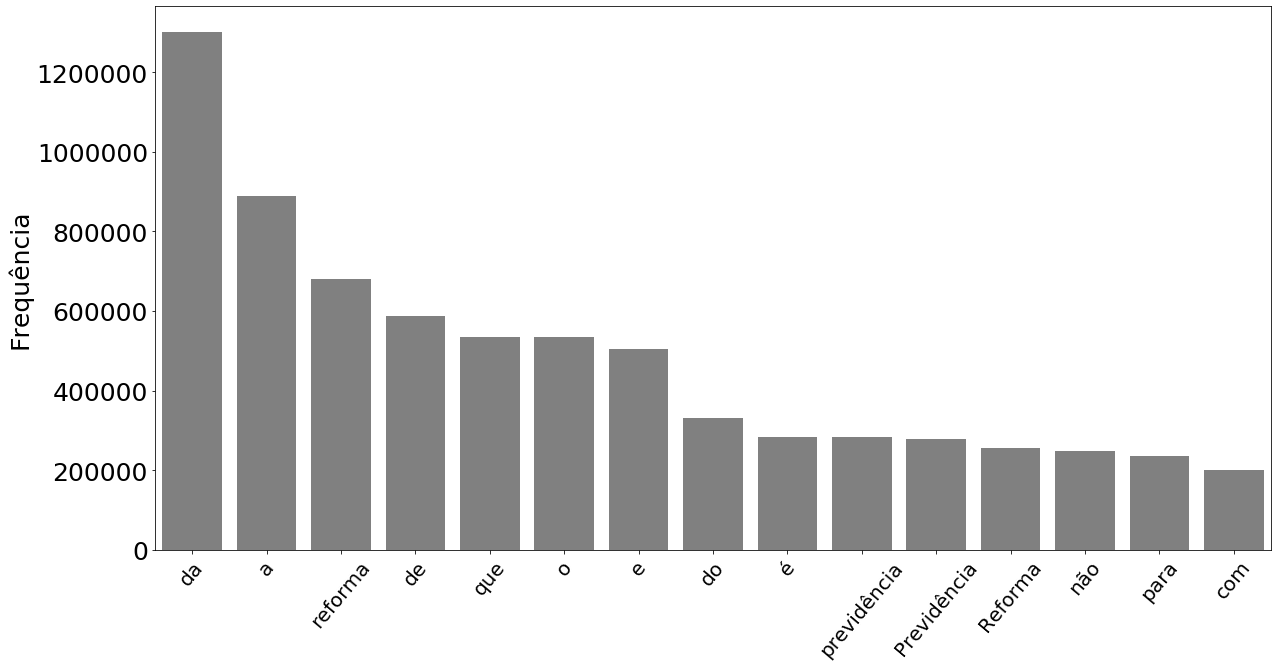

In [55]:
_pareto(frequencia_palavras)

In [56]:
frequencia_palavras = _dist_freq(base_coletada['Texto Processado'], 15)
frequencia_palavras

,Palavra,Frequencia
178,contra,121317
162,vai,109206
55,bolsonaro,100339
10,governo,96097
182,brasil,86262
0,emoticon_positivo,85040
32,sobre,73502
197,ser,66598
102,povo,57188
260,presidente,54137


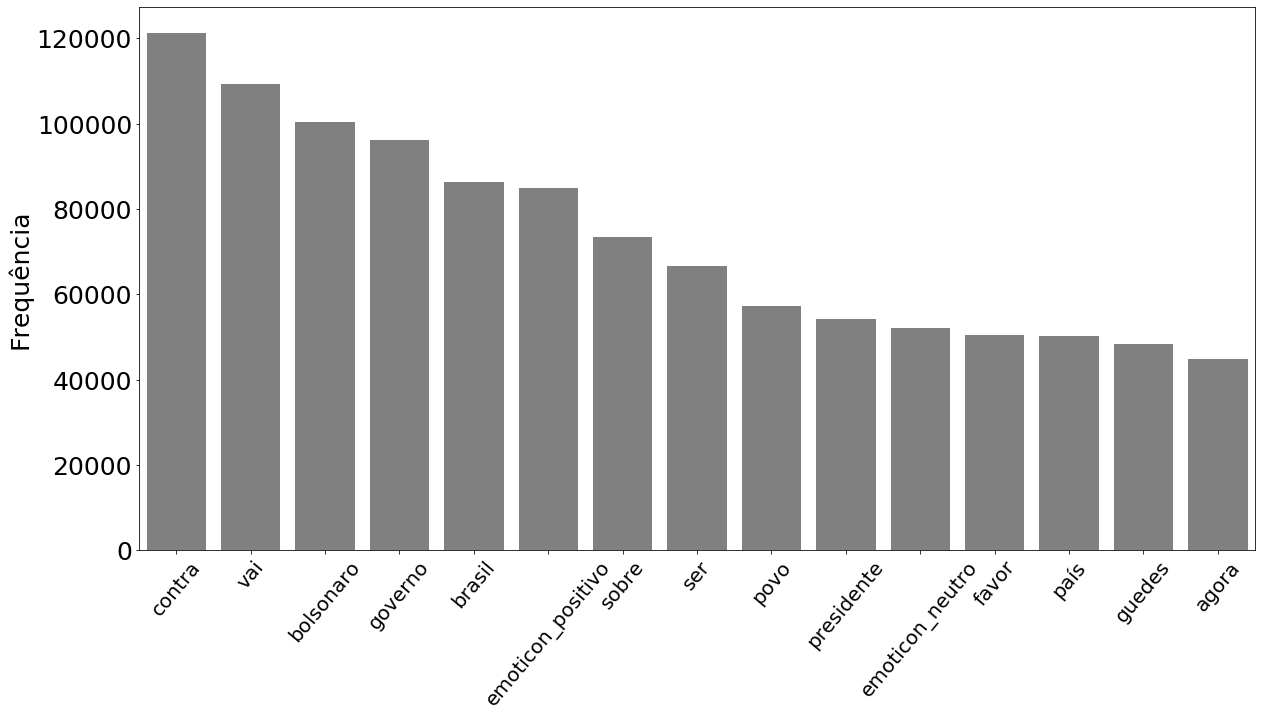

In [57]:
_pareto(frequencia_palavras)